In [52]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Directory for images
image_dir = 'dataset/balanced_dataset'
image_size = (128, 128)

# Load and preprocess images
def load_images_and_labels(data, image_dir, image_size):
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(image_dir, row['image_name'])
        if os.path.exists(image_path):
            img = load_img(image_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(row['target'])
        else:
            print(f"Image not found: {image_path}")
    return np.array(images), np.array(labels)

# Load dataset
data = pd.read_csv('dataset/balanced_metadata.csv')
images, labels = load_images_and_labels(data, image_dir, image_size)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
labels_one_hot = to_categorical(labels, num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the optimised shallow neural network model
model = Sequential([
    Flatten(input_shape=image_size + (3,)),  # Flatten the input images
    Dense(256, activation='relu'),          # First hidden layer
    BatchNormalization(),
    Dropout(0.3),                           # Dropout for regularisation
    Dense(128, activation='relu'),          # Second hidden layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),           # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, lr_scheduler])


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5794 - loss: 1.1292 - val_accuracy: 0.7681 - val_loss: 0.6329 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7242 - loss: 0.7196 - val_accuracy: 0.7294 - val_loss: 0.6883 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7690 - loss: 0.6125 - val_accuracy: 0.7350 - val_loss: 0.6718 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.7773 - loss: 0.5682 - val_accuracy: 0.7412 - val_loss: 0.6833 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8018 - loss: 0.4964 - val_accuracy: 0.7650 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8029 - loss: 0.4980 - val_accuracy: 0.7569 - val_loss: 0.6264 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8177 - loss: 0.

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.4895 - loss: 1.3039 - val_accuracy: 0.8100 - val_loss: 0.5464 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.7546 - loss: 0.6404 - val_accuracy: 0.8225 - val_loss: 0.5004 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.8148 - loss: 0.5122 - val_accuracy: 0.8406 - val_loss: 0.4304 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8369 - loss: 0.4549 - val_accuracy: 0.8556 - val_loss: 0.4076 - learning_rate: 1.0000e-04
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.8289 - loss: 0.4352 - val_accuracy: 0.8681 - val_loss: 0.3691 - learning_rate: 1.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.8458 - loss: 0.4069 - val_accuracy: 0.8731 - val_loss: 0.3513 - learning_rate: 1.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accurac

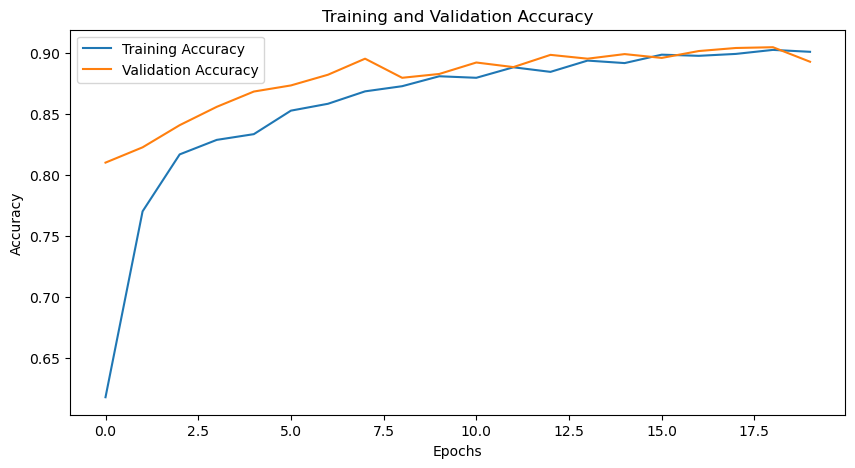

In [50]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Directory for images
image_dir = 'dataset/balanced_dataset'
image_size = (128, 128)  # Larger resolution for transfer learning

# Load and preprocess images
def load_images_and_labels(data, image_dir, image_size):
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(image_dir, row['image_name'])
        if os.path.exists(image_path):
            img = load_img(image_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(row['target'])
        else:
            print(f"Image not found: {image_path}")
    return np.array(images), np.array(labels)

# Load dataset
data = pd.read_csv('dataset/balanced_metadata.csv')
images, labels = load_images_and_labels(data, image_dir, image_size)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
labels_one_hot = to_categorical(labels, num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False  # Freeze the base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# Compile the final model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.6841 - loss: 0.8105 - val_accuracy: 0.8481 - val_loss: 0.4373 - learning_rate: 5.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8414 - loss: 0.4266 - val_accuracy: 0.8737 - val_loss: 0.3464 - learning_rate: 5.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8646 - loss: 0.3539 - val_accuracy: 0.8894 - val_loss: 0.3182 - learning_rate: 5.0000e-04
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.8688 - loss: 0.3287 - val_accuracy: 0.8919 - val_loss: 0.2991 - learning_rate: 5.0000e-04
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8856 - loss: 0.2963 - val_accuracy: 0.8938 - val_loss: 0.2842 - learning_rate: 5.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.8896 - loss: 0.2908 - val_accuracy: 0.9144 - val_loss: 0.2387 - learning_rate: 5.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accurac

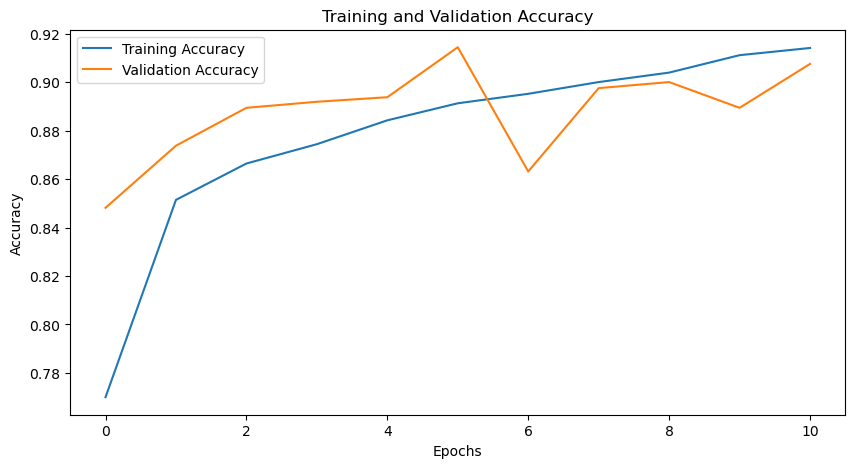

In [51]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Directory for images
image_dir = 'dataset/balanced_dataset'
image_size = (128, 128)  # Larger resolution for transfer learning

# Load and preprocess images
def load_images_and_labels(data, image_dir, image_size):
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(image_dir, row['image_name'])
        if os.path.exists(image_path):
            img = load_img(image_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(row['target'])
        else:
            print(f"Image not found: {image_path}")
    return np.array(images), np.array(labels)

# Load dataset
data = pd.read_csv('dataset/balanced_metadata.csv')
images, labels = load_images_and_labels(data, image_dir, image_size)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
labels_one_hot = to_categorical(labels, num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False  # Freeze the base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# Compile the final model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
